# **Set Path**

In [1]:
import sys
sys.path.append('/home/u170905/.local/lib/python3.6/site-packages')
sys.path.append('/home/u170905/.local/lib/python3.8/site-packages')
sys.path.append('/home/u170905/.local/bin')
print(sys.path)
print(sys.version)

['/opt/intel/openvino-lts/python/python3.6', '/opt/intel/openvino-lts/python/python3', '/opt/intel/openvino-lts/deployment_tools/open_model_zoo/tools/accuracy_checker', '/opt/intel/openvino-lts/deployment_tools/model_optimizer', '/opt/intel/openvino-lts/deployment_tools/tools/model_downloader', '/opt/intel/openvino-lts/data_processing/dl_streamer/python', '', '/opt/intel/openvino-lts/data_processing/gstreamer/lib/python3.8/site-packages', '/home/u170905/Petals', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/home/u170905/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/local/lib/python3.6/dist-packages/opencv_python-4.5.4.58-py3.6-linux-x86_64.egg', '/usr/local/lib/python3.6/dist-packages/editdistance-0.6.0-py3.6-linux-x86_64.egg', '/usr/local/lib/python3.6/dist-packages/sentencepiece-0.1.96-py3.6-linux-x86_64.egg', '/usr/local/lib/python3.6/dist-packages/nibabel-3.2.1-py3.6.egg', '/usr/local/lib/python3.6/dist-pac

# **INSTALL REQUIRED PACKAGES**

In [1]:
#!pip install opendatasets
#!pip install kaggle
#!pip install kaggledatasets


# **IMPORT LIBRARIES**

In [2]:
import math, re, os
import numpy as np
import tensorflow as tf
#import opendatasets as od

print("Tensorflow version " + tf.__version__)
!/home/u170905/.local/bin/kaggle competitions list

Tensorflow version 2.4.4
ref                                                                               deadline             category            reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/nfl-player-contact-detection                  2023-03-01 23:59:00  Featured          $100,000        674           False  
https://www.kaggle.com/competitions/godaddy-microbusiness-density-forecasting     2023-03-14 23:59:00  Featured           $60,000       2287           False  
https://www.kaggle.com/competitions/learning-equality-curriculum-recommendations  2023-03-14 23:59:00  Featured           $55,000        695           False  
https://www.kaggle.com/competitions/lux-ai-season-2                               2023-04-24 23:59:00  Featured           $55,000        136           False  
https://www.kaggle.co

# **DISTRIBUTION STRATEGY**

In [3]:
tf.config.list_physical_devices(device_type=None)


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
# Detect TPU, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() 
print(tpu)
print("REPLICAS: ", strategy.num_replicas_in_sync)

None
REPLICAS:  1


# **LOADING DATASET**

In [5]:
#from kaggledatasets import KaggleDatasets
import glob
DS_PATH = "Dataset"
print(glob.glob(DS_PATH+"/*"))

['Dataset/tfrecords-jpeg-331x331', 'Dataset/tfrecords-jpeg-192x192', 'Dataset/tfrecords-jpeg-512x512', 'Dataset/sample_submission.csv', 'Dataset/tfrecords-jpeg-224x224']


In [6]:
IMAGE_SIZE = [192, 192]
PATH = DS_PATH + '/tfrecords-jpeg-192x192'
AUTO = tf.data.experimental.AUTOTUNE

TRAINING_FILENAMES = glob.glob(PATH + '/train/*.tfrec')
VALIDATION_FILENAMES = glob.glob(PATH + '/val/*.tfrec')
TEST_FILENAMES = glob.glob(PATH + '/test/*.tfrec') 

CLASSES = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']                                                          

In [7]:
def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.reshape(image, [*IMAGE_SIZE, 3]) # explicit size needed for TPU
    return image

def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means single element
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    label = tf.cast(example['class'], tf.int32)
    return image, label # returns a dataset of (image, label) pairs

def read_unlabeled_tfrecord(example):
    UNLABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "id": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
        # class is missing, this competitions's challenge is to predict flower classes for the test dataset
    }
    example = tf.io.parse_single_example(example, UNLABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    idnum = example['id']
    return image, idnum # returns a dataset of image(s)

def load_dataset(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord if labeled else read_unlabeled_tfrecord, num_parallel_calls=AUTO)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

**DATA PIPELINE**

In [8]:
def data_augment_train(image, label):
    # Thanks to the dataset.prefetch(AUTO)
    # statement in the next function (below), this happens essentially
    # for free on TPU. Data pipeline code is executed on the "CPU"
    # part of the TPU while the TPU itself is computing gradients.
    image = tf.image.resize(image, [192, 192])
    image = tf.image.random_flip_left_right(image)
    return image, label 

def data_augment_test_val(image, label):
    # Thanks to the dataset.prefetch(AUTO)
    # statement in the next function (below), this happens essentially
    # for free on TPU. Data pipeline code is executed on the "CPU"
    # part of the TPU while the TPU itself is computing gradients.
    image = tf.image.resize(image, [192, 192])
    return image, label   

def get_training_dataset():
    dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
    dataset = dataset.map(data_augment_train, num_parallel_calls=AUTO)
    dataset = dataset.repeat() # the training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def get_validation_dataset(ordered=False):
    dataset = load_dataset(VALIDATION_FILENAMES, labeled=True, ordered=ordered)
    dataset = dataset.map(data_augment_test_val, num_parallel_calls=AUTO)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.cache()
    dataset = dataset.prefetch(AUTO)
    return dataset

def get_test_dataset(ordered=False):
    dataset = load_dataset(TEST_FILENAMES, labeled=False, ordered=ordered)
    dataset = dataset.map(data_augment_test_val, num_parallel_calls=AUTO)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset

def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec
    # files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)
    #return len(filenames)

def create_dataset(img_list, target_size=(224,224)):
    X = []
    mycounter = 0
    for img_path in img_list:
        img = cv2.imread(img_path)
        img = cv2.resize(img, target_size)
        mycounter = mycounter +1
        X.append(img)
        if mycounter == 10: 
            return np.array(X)
    return np.array(X)

def preprocess_image(image_path):
  # Load the image from file
  image = tf.io.read_file(image_path)
  # Decode the JPEG image
  image = tf.image.decode_jpeg(image)
  # Resize the image
  image = tf.image.resize(image, (224, 224))
  # Normalize the pixel values
  image = tf.keras.applications.resnet.preprocess_input(image)
  return image

NUM_TRAINING_IMAGES = count_data_items(TRAINING_FILENAMES)
NUM_VALIDATION_IMAGES = count_data_items(VALIDATION_FILENAMES)
NUM_TEST_IMAGES = count_data_items(TEST_FILENAMES)
print('Dataset: {} training images, {} validation images, {} unlabeled test images'.format(NUM_TRAINING_IMAGES, NUM_VALIDATION_IMAGES, NUM_TEST_IMAGES))


Dataset: 12753 training images, 3712 validation images, 7382 unlabeled test images


In [9]:
# Define the batch size. This will be 16 with TPU off and 128 (=16*8) with TPU on
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

BATCH_SIZE = 16 * strategy.num_replicas_in_sync
print("Batch Size is :",   BATCH_SIZE)

ds_train = get_training_dataset()
ds_valid = get_validation_dataset()
ds_test = get_test_dataset()

#ds_train = tf.data.Dataset.from_tensor_slices(TRAINING_FILENAMES)
#ds_train = ds_train.map(preprocess_image)

#ds_train = create_dataset(TRAINING_FILENAMES)
#ds_valid = create_dataset(VALIDATION_FILENAMES)
#ds_test = create_dataset(TEST_FILENAMES)

#train_labels = np.random.randint(0, 2, size=(len(ds_train),))
#valid_labels = np.random.randint(0, 2, size=(len(ds_valid),))
#test_labels = np.random.randint(0, 2, size=(len(ds_test),))

print("Training:", ds_train)
print ("Validation:", ds_valid)
print("Test:", ds_test)


Batch Size is : 16
Training: <PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>
Validation: <PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>
Test: <PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.string)>


In [10]:
np.set_printoptions(threshold=15, linewidth=80)

print("Train data shapes:")
for image, idnum in ds_train.take(3):
    print(image.numpy().shape, idnum.numpy().shape)
print("Train data IDs:", idnum.numpy().astype('U')) # U=unicode string

Train data shapes:
(16, 192, 192, 3) (16,)
(16, 192, 192, 3) (16,)
(16, 192, 192, 3) (16,)
Train data IDs: ['90' '14' '103' ... '10' '75' '53']


In [11]:
print("Test data shapes:")
for image, idnum in ds_test.take(3):
    print(image.numpy().shape, idnum.numpy().shape)
print("Test data IDs:", idnum.numpy().astype('U')) 

Test data shapes:
(16, 192, 192, 3) (16,)
(16, 192, 192, 3) (16,)
(16, 192, 192, 3) (16,)
Test data IDs: ['fd168583e' '0e8760c38' '5ff57970a' ... 'dd959de66' '38ea80b60' '910b97274']


# **EXPLORE DATA**

In [12]:
from matplotlib import pyplot as plt

def batch_to_numpy_images_and_labels(data):
    images, labels = data
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    if numpy_labels.dtype == object: # binary string in this case,
                                     # these are image ID strings
        numpy_labels = [None for _ in enumerate(numpy_images)]
    # If no labels, only image IDs, return None for labels (this is
    # the case for test data)
    return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
    if correct_label is None:
        return CLASSES[label], True
    correct = (label == correct_label)
    return "{} [{}{}{}]".format(CLASSES[label], 'OK' if correct else 'NO', u"\u2192" if not correct else '',
                                CLASSES[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize) if not red else int(titlesize/1.2), color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)
    
def display_batch_of_images(databatch, predictions=None):
    """This will work with:
    display_batch_of_images(images)
    display_batch_of_images(images, predictions)
    display_batch_of_images((images, labels))
    display_batch_of_images((images, labels), predictions)
    """
    # data
    images, labels = batch_to_numpy_images_and_labels(databatch)
    if labels is None:
        labels = [None for _ in enumerate(images)]
        
    # auto-squaring: this will drop data that does not fit into square
    # or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows
        
    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))
    
    # display
    for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
        title = '' if label is None else CLASSES[label]
        correct = True
        if predictions is not None:
            title, correct = title_from_label_and_target(predictions[i], label)
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 # magic formula tested to work from 1x1 to 10x10 images
        subplot = display_one_flower(image, title, subplot, not correct, titlesize=dynamic_titlesize)
    
    #layout
    plt.tight_layout()
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()


def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

In [13]:
ds_iter = iter(ds_train.unbatch().batch(20))

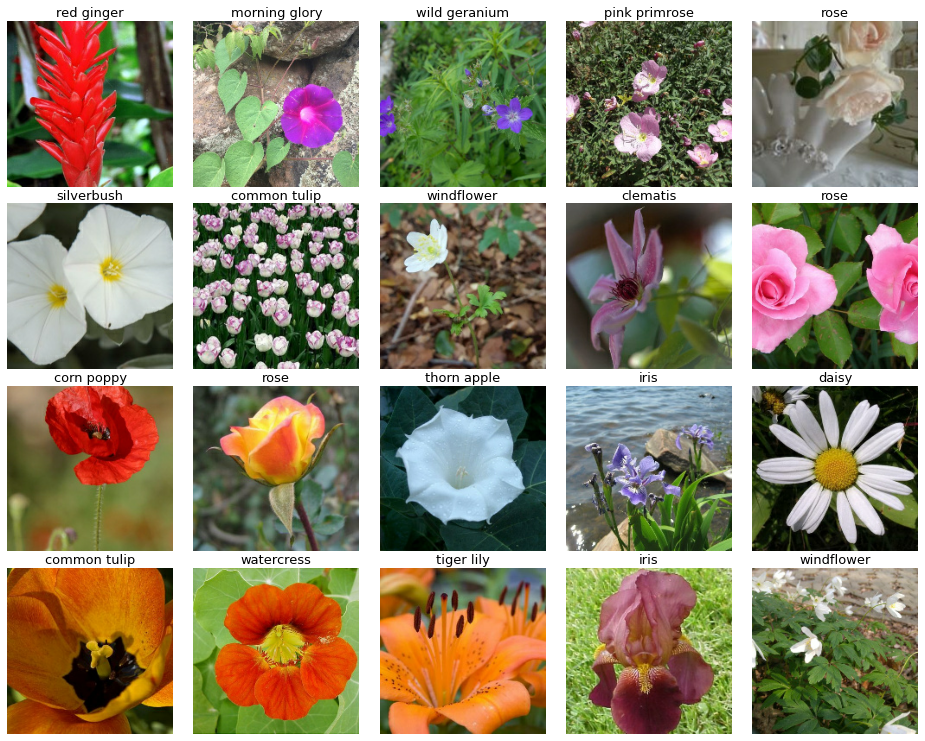

In [14]:
one_batch = next(ds_iter)
display_batch_of_images(one_batch)

# **MODELLING**

Build 2 models, one using ResNet50 and one using Keras

In [15]:
EPOCHS = 50
from tensorflow.keras.models import Model
from tensorflow import keras

with strategy.scope():
    pretrained_model = tf.keras.applications.resnet50.ResNet50(
        weights='imagenet',
        include_top=False ,
        input_shape=[*IMAGE_SIZE, 3],
        pooling='avg',
    )
    pretrained_model.trainable = True
    
    x = pretrained_model.output
    predictions = tf.keras.layers.Dense(len(CLASSES), activation='softmax')(x)
    model = tf.keras.models.Model(inputs=pretrained_model.input, outputs=predictions)
    
# Build a simple CNN model
pretrained_model2 = tf.keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', input_shape=(192,192,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

Compile the 2 models

In [16]:
#NAdam (Nesterov-accelerated Adaptive Moment Estimation) is a variant of the Adam optimization algorithm for training neural networks in artificial intelligence. It is a combination of the Nesterov accelerated gradient descent
model.compile(
    optimizer='nadam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)

model.summary()

# Adam = Adaptive Moment Estimation
pretrained_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

pretrained_model2.summary()
#history = model.fit(ds_train, train_labels, epochs=10, batch_size=BATCH_SIZE)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 192, 192, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 198, 198, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 96, 96, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 96, 96, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [17]:
model.input
pretrained_model2.input

<KerasTensor: shape=(None, 192, 192, 3) dtype=float32 (created by layer 'conv2d_input')>

# **TRAINING**

Learning rate schedule: 1e-05 to 5e-05 to 1e-05


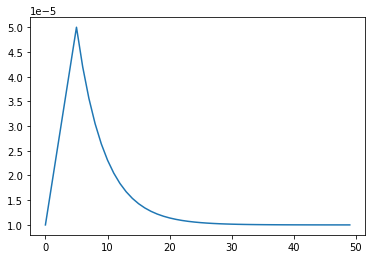

In [18]:
# Learning Rate Schedule for Fine Tuning #
def exponential_lr(epoch,
                   start_lr = 0.00001, min_lr = 0.00001, max_lr = 0.00005,
                   rampup_epochs = 5, sustain_epochs = 0,
                   exp_decay = 0.8):

    def lr(epoch, start_lr, min_lr, max_lr, rampup_epochs, sustain_epochs, exp_decay):
        # linear increase from start to rampup_epochs
        if epoch < rampup_epochs:
            lr = ((max_lr - start_lr) /
                  rampup_epochs * epoch + start_lr)
        # constant max_lr during sustain_epochs
        elif epoch < rampup_epochs + sustain_epochs:
            lr = max_lr
        # exponential decay towards min_lr
        else:
            lr = ((max_lr - min_lr) *
                  exp_decay**(epoch - rampup_epochs - sustain_epochs) +
                  min_lr)
        return lr
    return lr(epoch,
              start_lr,
              min_lr,
              max_lr,
              rampup_epochs,
              sustain_epochs,
              exp_decay)

lr_callback = tf.keras.callbacks.LearningRateScheduler(exponential_lr, verbose=True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2, mode='min')

rng = [i for i in range(EPOCHS)]
y = [exponential_lr(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

# **FIT THE MODEL** (i.e. train it on the dataset)

In [21]:
# Define training epochs
EPOCHS = 30
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

training_history = pretrained_model2.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=EPOCHS,
    steps_per_epoch=10,
#    callbacks=[lr_callback],
    callbacks=[early_stop],
)

Epoch 1/30
10/10 [==============================] - 44s 5s/step - loss: -444055.9375 - accuracy: 0.0000e+00 - val_loss: -1154276.2500 - val_accuracy: 0.0019
Epoch 2/30
10/10 [==============================] - 42s 5s/step - loss: -2499841.2500 - accuracy: 0.0000e+00 - val_loss: -5320229.5000 - val_accuracy: 0.0019
Epoch 3/30
10/10 [==============================] - 42s 5s/step - loss: -10165523.0000 - accuracy: 0.0000e+00 - val_loss: -17737892.0000 - val_accuracy: 0.0019
Epoch 4/30
10/10 [==============================] - 43s 5s/step - loss: -29808314.0000 - accuracy: 0.0000e+00 - val_loss: -48613812.0000 - val_accuracy: 0.0019
Epoch 5/30
10/10 [==============================] - 42s 5s/step - loss: -70759248.0000 - accuracy: 0.0000e+00 - val_loss: -113887144.0000 - val_accuracy: 0.0019
Epoch 6/30
10/10 [==============================] - 42s 5s/step - loss: -166047456.0000 - accuracy: 0.0000e+00 - val_loss: -238804896.0000 - val_accuracy: 0.0019
Epoch 7/30
10/10 [========================

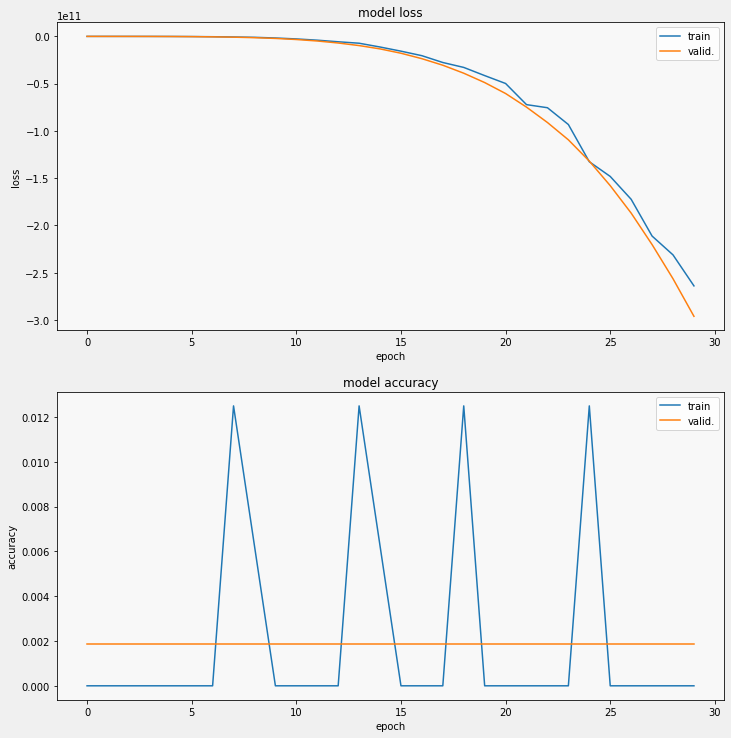

In [22]:
display_training_curves(
    training_history.history['loss'],
    training_history.history['val_loss'],
    'loss',
    211,
)

display_training_curves(
    training_history.history['accuracy'],
    training_history.history['val_accuracy'],
    'accuracy',
    212,
)

# **EVALUATE THE MODEL**

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

def display_confusion_matrix(cmat, score, precision, recall):
    plt.figure(figsize=(15,15))
    ax = plt.gca()
    ax.matshow(cmat, cmap='Reds')
    ax.set_xticks(range(len(CLASSES)))
    ax.set_xticklabels(CLASSES, fontdict={'fontsize': 7})
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    ax.set_yticks(range(len(CLASSES)))
    ax.set_yticklabels(CLASSES, fontdict={'fontsize': 7})
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    titlestring = ""
    if score is not None:
        titlestring += 'f1 = {:.3f} '.format(score)
    if precision is not None:
        titlestring += '\nprecision = {:.3f} '.format(precision)
    if recall is not None:
        titlestring += '\nrecall = {:.3f} '.format(recall)
    if len(titlestring) > 0:
        ax.text(101, 1, titlestring, fontdict={'fontsize': 18, 'horizontalalignment':'right', 'verticalalignment':'top', 'color':'#804040'})
    plt.show()
    
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

# **CONFUSION MATRIX**

In [24]:
cmdataset = get_validation_dataset(ordered=True)
images_ds = cmdataset.map(lambda image, label: image)
labels_ds = cmdataset.map(lambda image, label: label).unbatch()

cm_correct_labels = next(iter(labels_ds.batch(NUM_VALIDATION_IMAGES))).numpy()
cm_probabilities = model.predict(images_ds)
cm_predictions = np.argmax(cm_probabilities, axis=-1)

labels = range(len(CLASSES))
cmat = confusion_matrix(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
)
cmat = (cmat.T / cmat.sum(axis=1)).T # normalize

/data/venv/openvino_2022.1.0.643-tensorflow_2.4/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


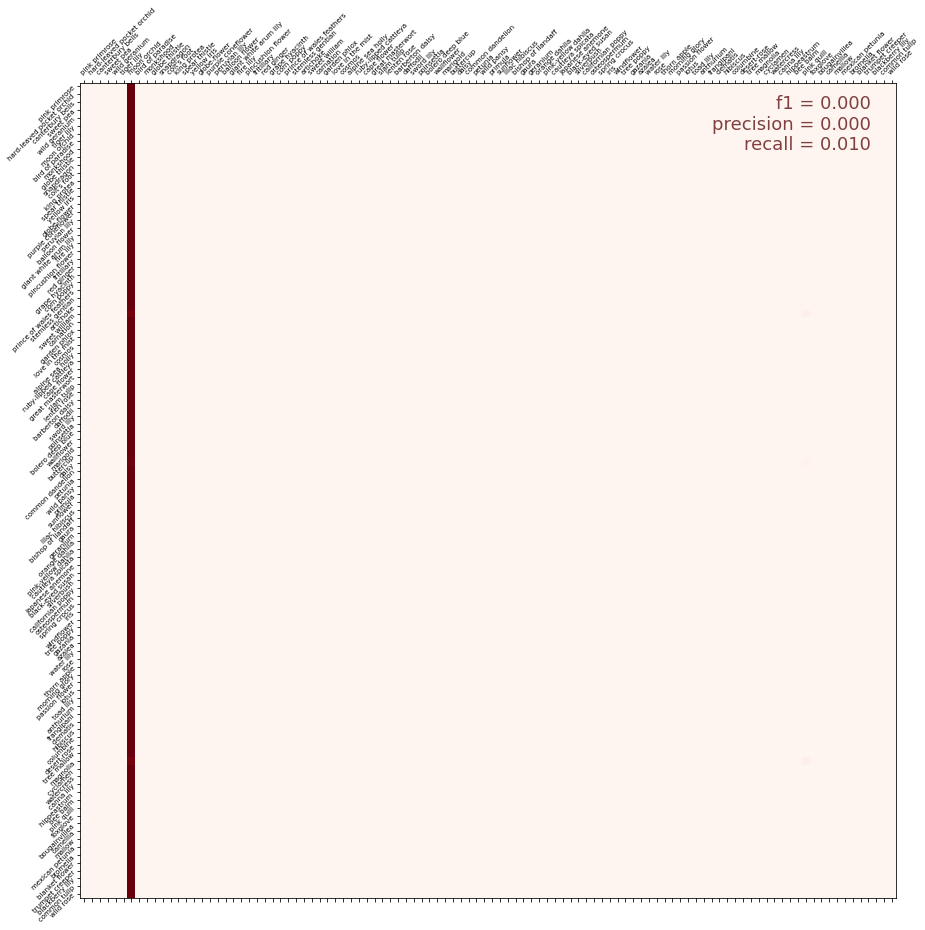

In [25]:
score = f1_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
precision = precision_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
recall = recall_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
display_confusion_matrix(cmat, score, precision, recall)


# **VISUAL VALIDATION**

In [26]:
dataset = get_validation_dataset()
dataset = dataset.unbatch().batch(20)
batch = iter(dataset)

In [ ]:
images, labels = next(batch)
probabilities = model.predict(images)
predictions = np.argmax(probabilities, axis=-1)
display_batch_of_images((images, labels), predictions)


**TEST PREDICTIONS**

In [25]:
test_ds = get_test_dataset(ordered=True)

print('Computing predictions...')
test_images_ds = test_ds.map(lambda image, idnum: image)
probabilities = model.predict(test_images_ds)
predictions = np.argmax(probabilities, axis=-1)
print(predictions)

Computing predictions...
[ 67  28  83 ...  74 102  62]


# **SUBMISSION**

In [26]:
test_ids_ds = test_ds.map(lambda image, idnum: idnum).unbatch()
test_ids = next(iter(test_ids_ds.batch(NUM_TEST_IMAGES))).numpy().astype('U')


In [27]:
df = {
    'id':test_ids,
    'label':predictions
}
df = pd.DataFrame(df)
df.head()

,id,label
0,252d840db,67
1,1c4736dea,28
2,c37a6f3e9,83
3,00e4f514e,103
4,59d1b6146,70


In [28]:
df.to_csv('submission.csv',index=False)